In [72]:
import pandas as pd
import numpy as np

df=pd.read_csv('Data/sentiment-emotion-labelled_Dell_tweets.csv')
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


<Axes: xlabel='sentiment', ylabel='count'>

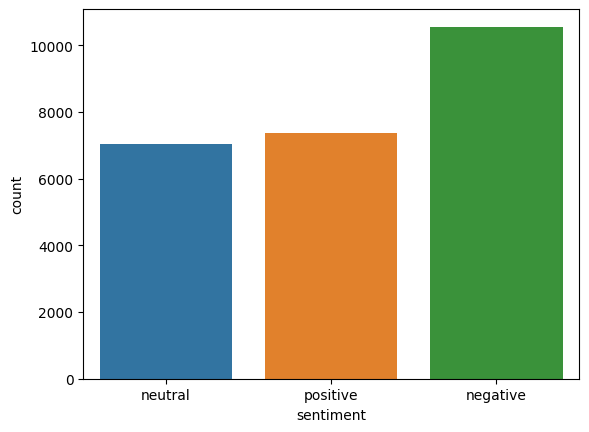

In [73]:
import seaborn as sns

sns.countplot(df,x='sentiment')

In [74]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['sentiment']=encoder.fit_transform(df['sentiment'])

In [75]:
from sklearn.model_selection import train_test_split

X = df['Text'].values
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [76]:
print('Max token in sentence: ',np.max([len(i.split(' ')) for i in X.tolist()]))

Max token in sentence:  151


...

In [77]:
from keras.preprocessing.text import Tokenizer

In [78]:
VOCABULARY_SIZE = 10000
EMBEDDING_DIM = 64
MAX_LENGTH = 100


In [79]:
token = Tokenizer(num_words=VOCABULARY_SIZE, oov_token='<OOV>')
token.fit_on_texts(X_train.tolist())


In [80]:
print('V: ',len(token.word_counts))

V:  42129


In [81]:
X_train_sequence=token.texts_to_sequences(X_train.tolist())
X_train_sequence

[[31, 827, 637, 629, 4319, 65, 394, 54, 614, 6, 243, 21, 4, 30, 31, 2, 207],
 [6357, 2, 868, 22, 11, 6, 8544, 157, 414, 1],
 [1,
  2,
  67,
  7,
  186,
  27,
  28,
  350,
  3,
  188,
  27,
  36,
  1190,
  95,
  7,
  424,
  57,
  36,
  910,
  22,
  3,
  2492,
  36,
  285,
  485,
  5,
  3,
  163,
  268,
  8545],
 [1,
  1,
  4320,
  1,
  1,
  1,
  2,
  5101,
  1,
  2122,
  1,
  1,
  1,
  432,
  2253,
  1,
  7,
  424,
  15,
  23,
  6,
  132,
  149],
 [1,
  548,
  199,
  2410,
  146,
  8546,
  335,
  69,
  187,
  15,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  5,
  8547,
  12,
  38,
  1,
  3053,
  4,
  74,
  2410,
  5,
  601,
  122,
  1568,
  84,
  248,
  20,
  240,
  3797,
  10,
  8,
  9,
  1],
 [7247, 774, 2, 3798, 3799, 38, 432],
 [1,
  856,
  211,
  11,
  6,
  335,
  2254,
  12,
  3,
  911,
  57,
  467,
  3,
  1840,
  13,
  2,
  2255,
  1,
  5,
  1,
  12,
  64,
  7248,
  19,
  856,
  10,
  8,
  9,
  1],
 [7,
  105,
  4,
  314,
  17,
  2,
  2329,
  139,
  14,
  1,
  29,
  44,
  193,
  284,
  3,

In [82]:
# Add padding
from keras.utils import pad_sequences

X_train_padding = pad_sequences(X_train_sequence, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_train_padding

array([[  31,  827,  637, ...,    0,    0,    0],
       [6357,    2,  868, ...,    0,    0,    0],
       [   1,    2,   67, ...,    0,    0,    0],
       ...,
       [   2, 1902,    1, ...,    0,    0,    0],
       [   1,    1,    2, ...,    0,    0,    0],
       [ 334,    2,  364, ...,    0,    0,    0]])

In [83]:
X_train_padding.shape

(19976, 100)

In [84]:
X_test_sequence = token.texts_to_sequences(X_test)
X_test_sequence

[[234, 77, 2, 159, 20, 11, 3, 2383, 22, 27, 46, 287, 15, 10, 8, 9, 1],
 [1, 2, 1545, 1, 7, 95, 643, 1763],
 [1,
  2898,
  8239,
  2,
  292,
  3837,
  155,
  799,
  104,
  14,
  6,
  1663,
  5264,
  669,
  18,
  6,
  2,
  2049,
  1981,
  387,
  4040,
  176,
  52,
  4337,
  1681,
  6486,
  1,
  218,
  16,
  58,
  32,
  10,
  8,
  9,
  1,
  4,
  48,
  6,
  1812,
  12,
  25,
  141,
  10,
  8,
  9,
  1],
 [2, 1],
 [7,
  60,
  20,
  2,
  3966,
  1299,
  49,
  411,
  1195,
  222,
  15,
  3229,
  49,
  411,
  692,
  22,
  3406,
  4541,
  341,
  7,
  1564,
  52,
  173,
  9240,
  16,
  1,
  14,
  6,
  3379,
  1965,
  52,
  1,
  1132,
  194,
  10,
  8,
  9,
  5854,
  1536,
  394,
  802,
  5855,
  873],
 [187, 15, 2, 2, 31, 12, 228, 1121, 263, 10, 8, 9, 1],
 [38,
  2,
  5,
  1646,
  5181,
  748,
  37,
  1048,
  4,
  245,
  6,
  63,
  94,
  82,
  92,
  11,
  3929,
  13,
  129,
  209,
  13,
  6,
  39,
  21,
  5,
  37,
  9162,
  54,
  3,
  130,
  4,
  245,
  20,
  50,
  15,
  532,
  156,
  3,
  209,


In [85]:
X_test_padding = pad_sequences(X_test_sequence, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test_padding


array([[ 234,   77,    2, ...,    0,    0,    0],
       [   1,    2, 1545, ...,    0,    0,    0],
       [   1, 2898, 8239, ...,    0,    0,    0],
       ...,
       [   2,   11,   16, ...,    0,    0,    0],
       [2681,   87,  543, ...,    0,    0,    0],
       [   2,   68,  439, ...,    0,    0,    0]])

In [86]:
X_test_padding.shape

(4994, 100)

# Training Sentiment Classifier with Embedding Vector

## Embedding

In [87]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [88]:
model = Sequential()
model.add(Embedding(input_dim=VOCABULARY_SIZE,output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           640000    
                                                                 
 flatten_3 (Flatten)         (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                204832    
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 844,931
Trainable params: 844,931
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [91]:
model.fit(X_train_padding, y_train, batch_size=32, epochs=10,
          validation_data=(X_test_padding, y_test))


Epoch 1/10


625/625 [==============================] - 15s 21ms/step - loss: 0.7068 - accuracy: 0.6759 - val_loss: 0.5507 - val_accuracy: 0.7637
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 0.3590 - accuracy: 0.8622 - val_loss: 0.5716 - val_accuracy: 0.7695
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 0.1454 - accuracy: 0.9529 - val_loss: 0.6616 - val_accuracy: 0.7739
Epoch 4/10
625/625 [==============================] - 13s 21ms/step - loss: 0.0579 - accuracy: 0.9839 - val_loss: 0.7828 - val_accuracy: 0.7725
Epoch 5/10
625/625 [==============================] - 14s 22ms/step - loss: 0.0287 - accuracy: 0.9930 - val_loss: 0.9358 - val_accuracy: 0.7593
Epoch 6/10
625/625 [==============================] - 13s 21ms/step - loss: 0.0197 - accuracy: 0.9956 - val_loss: 0.9743 - val_accuracy: 0.7541
Epoch 7/10
625/625 [==============================] - 13s 21ms/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 1.0794 - val_accuracy: 0.7653
Epo